In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
%%capture
! pip install seaborn
import matplotlib as plot 
import sklearn
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import datasets
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline

# Data Cleaning
### Remove unnecessary columns leaving on relevant features.

In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
a= df['SEVERITYCODE'] - df['SEVERITYCODE.1']
a.sum()

0

In [8]:
# Lets remove some features since it was repeated and gives away the target label.

df = df.drop(['SEVERITYCODE.1', 'SEVERITYDESC'], axis=1)
df.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [9]:
df['SEVERITYCODE']

0         2
1         1
2         1
3         1
4         2
5         1
6         1
7         2
8         1
9         2
10        1
11        1
12        1
13        1
14        2
15        1
16        2
17        1
18        2
19        1
20        2
21        2
22        1
23        1
24        2
25        2
26        1
27        1
28        1
29        1
         ..
194643    1
194644    1
194645    2
194646    1
194647    2
194648    1
194649    2
194650    2
194651    1
194652    1
194653    2
194654    1
194655    2
194656    2
194657    1
194658    1
194659    1
194660    2
194661    2
194662    1
194663    2
194664    1
194665    1
194666    2
194667    1
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 194673, dtype: int64

##### Only two labels are available for the target

In [11]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [12]:
# Count missing data if present
missing_df = df.isnull()
for column in missing_df.columns.values.tolist():
    print(column)
    print (missing_df[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, 

#### Removing missing data removes all rows hence it is a good idea to leave them. Otherwise you can replace missing values with the mean of that variable but this will mean analysis each variable and this will take some time

In [13]:
# Print number of missing data. Check RHOB column

print("number of NaN values for all columns in df :", df.isnull().sum())

number of NaN values for all columns in df : SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64


In [14]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


## Data Exploration
#### Lets first have a descriptive exploration on our data.

In [15]:
df['COLLISIONTYPE'].fillna('Unknown', inplace = True)
df['WEATHER'].fillna('Unknown', inplace = True)
df['ROADCOND'].fillna('Unknown', inplace = True)
df['LIGHTCOND'].fillna('Unknown', inplace = True)
df['SPEEDING'].fillna('N', inplace = True)
df['JUNCTIONTYPE'].fillna('Unknown', inplace = True)

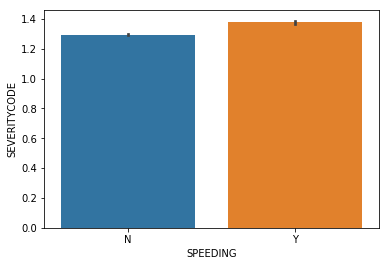

In [16]:
sns.barplot(x=df['SPEEDING'], y=df['SEVERITYCODE'])

[Text(0, 0, 'At Intersection (intersection related)'),
 Text(0, 0, 'Mid-Block (not related to intersection)'),
 Text(0, 0, 'Driveway Junction'),
 Text(0, 0, 'Mid-Block (but intersection related)'),
 Text(0, 0, 'At Intersection (but not related to intersection)'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Ramp Junction')]

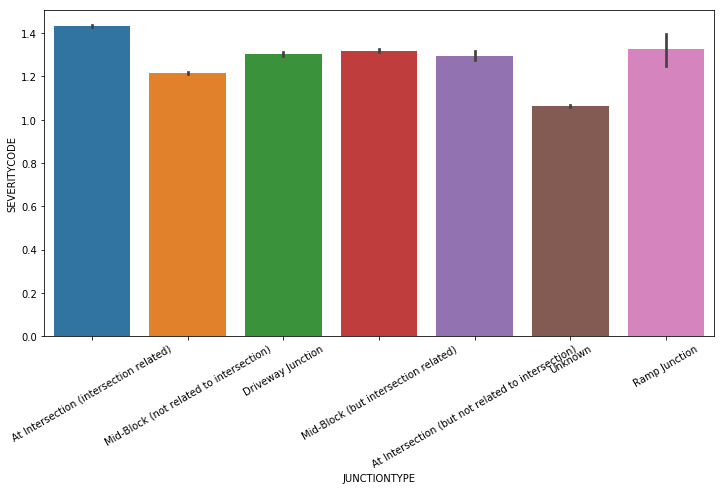

In [17]:
fig, axarr = plt.subplots(figsize=(12,6))
g= sns.barplot(x=df['JUNCTIONTYPE'], y=df['SEVERITYCODE'])
g.set_xticklabels(g.get_xticklabels(),rotation=30)

[Text(0, 0, 'Overcast'),
 Text(0, 0, 'Raining'),
 Text(0, 0, 'Clear'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Snowing'),
 Text(0, 0, 'Fog/Smog/Smoke'),
 Text(0, 0, 'Sleet/Hail/Freezing Rain'),
 Text(0, 0, 'Blowing Sand/Dirt'),
 Text(0, 0, 'Severe Crosswind'),
 Text(0, 0, 'Partly Cloudy')]

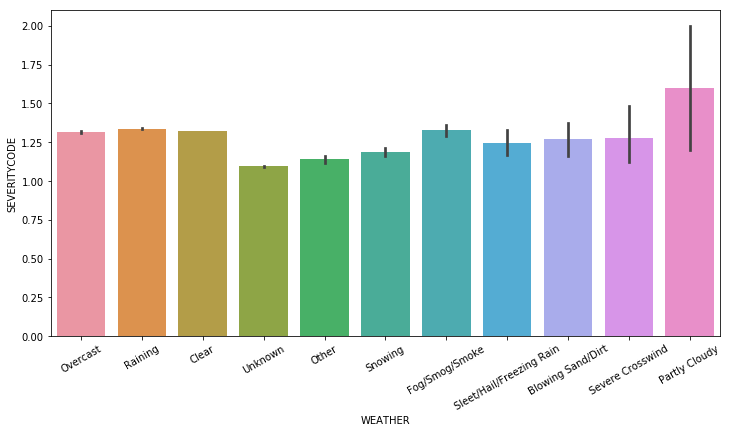

In [83]:
fig, axarr = plt.subplots(figsize=(12,6))
g= sns.barplot(x=df['WEATHER'], y=df['SEVERITYCODE'])
g.set_xticklabels(g.get_xticklabels(),rotation=30)

[Text(0, 0, 'Daylight'),
 Text(0, 0, 'Dark - Street Lights On'),
 Text(0, 0, 'Dark - No Street Lights'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Dusk'),
 Text(0, 0, 'Dawn'),
 Text(0, 0, 'Dark - Street Lights Off'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Dark - Unknown Lighting')]

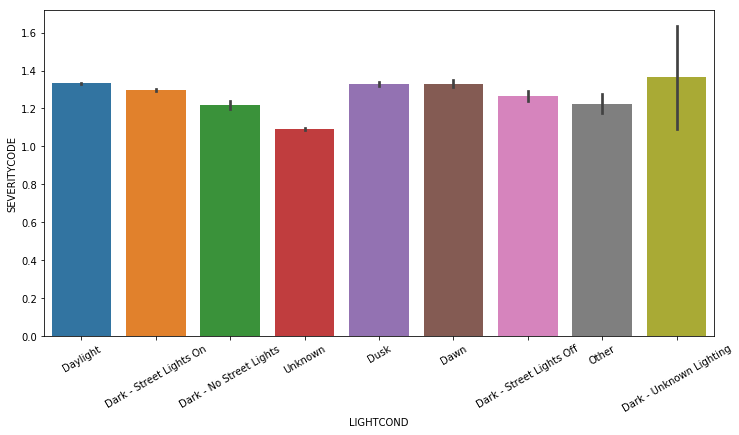

In [84]:
fig, axarr = plt.subplots(figsize=(12,6))
g= sns.barplot(x=df['LIGHTCOND'], y=df['SEVERITYCODE'])
g.set_xticklabels(g.get_xticklabels(),rotation=30)

[Text(0, 0, 'Wet'),
 Text(0, 0, 'Dry'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Snow/Slush'),
 Text(0, 0, 'Ice'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Sand/Mud/Dirt'),
 Text(0, 0, 'Standing Water'),
 Text(0, 0, 'Oil')]

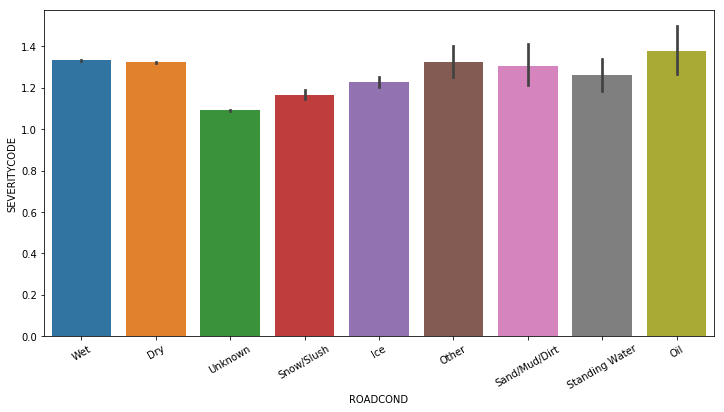

In [85]:
fig, axarr = plt.subplots(figsize=(12,6))
g= sns.barplot(x=df['ROADCOND'], y=df['SEVERITYCODE'])
g.set_xticklabels(g.get_xticklabels(),rotation=30)

[Text(0, 0, 'Angles'),
 Text(0, 0, 'Sideswipe'),
 Text(0, 0, 'Parked Car'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Cycles'),
 Text(0, 0, 'Rear Ended'),
 Text(0, 0, 'Head On'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Left Turn'),
 Text(0, 0, 'Pedestrian'),
 Text(0, 0, 'Right Turn')]

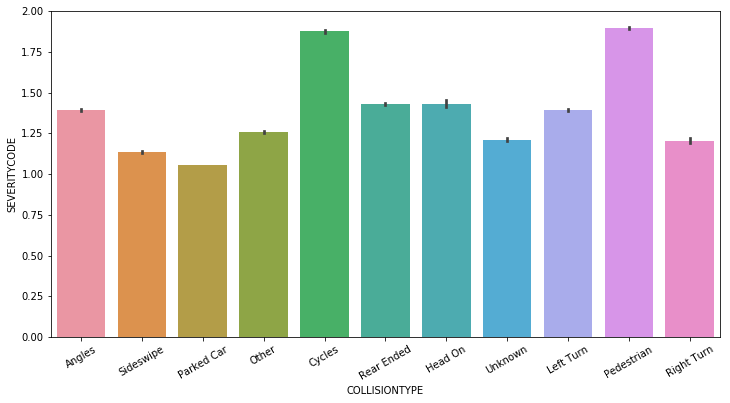

In [86]:
fig, axarr = plt.subplots(figsize=(12,6))
g= sns.barplot(x=df['COLLISIONTYPE'], y=df['SEVERITYCODE'])
g.set_xticklabels(g.get_xticklabels(),rotation=30)

In [18]:
# Lets see the correlation between each parameter

df.corr(method='pearson')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326
PEDCYLCOUNT,0.214218,-0.001752,0.026304,0.034432,0.031342,0.031296,0.000531,-0.038809,-0.016920,1.000000,-0.253773,0.382521,0.034593,0.453657,0.109820


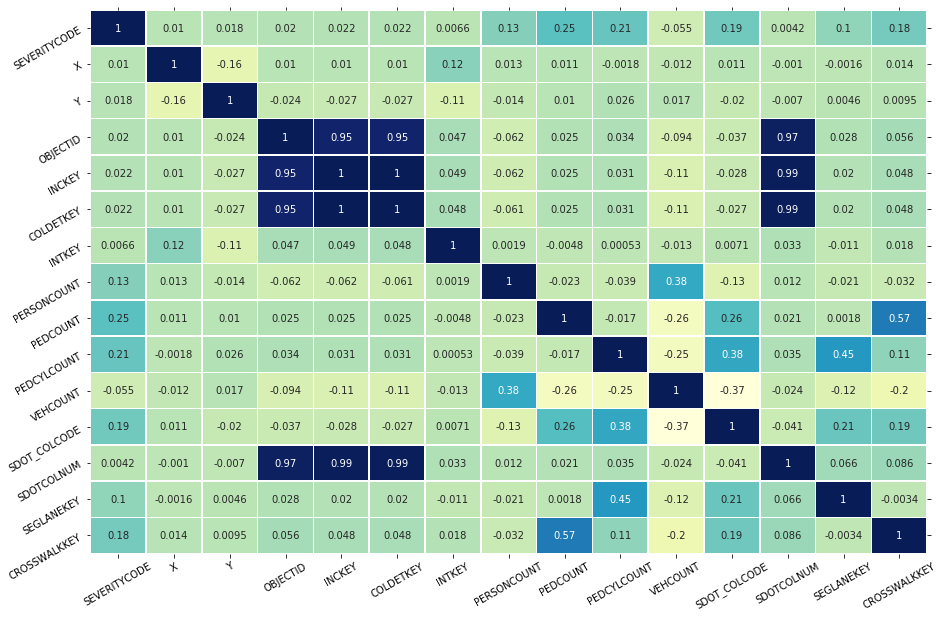

In [25]:

#Create Heatmap
fig, ax = plt.subplots(figsize=(15,10))
corrmap = sns.heatmap(df.corr(method='pearson'), annot=True, cmap="YlGnBu", linewidths=.5, ax=ax, cbar=False)

#Set all sides
corrmap.tick_params(right=True, top=True,rotation=30)

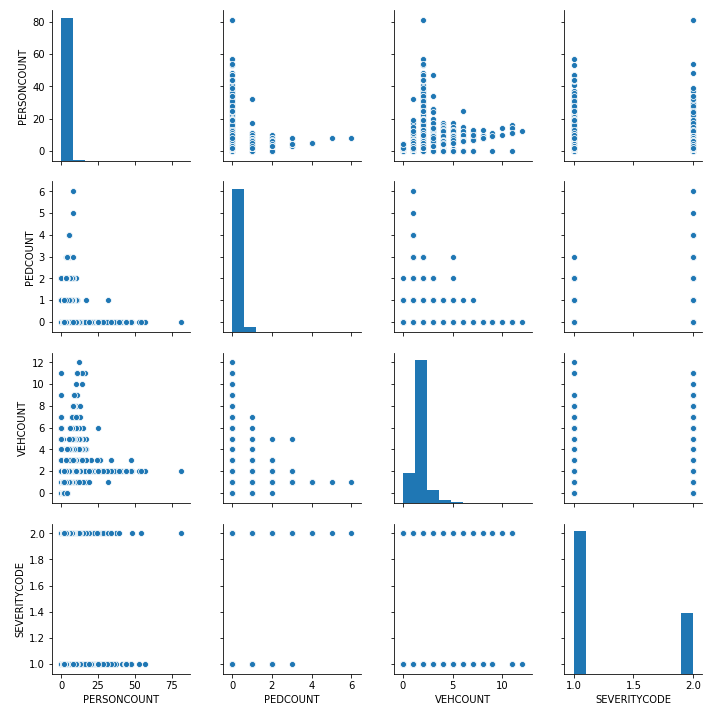

In [26]:
# Matrix of crossplots to visualize the variation between the parameters in the data set.
sns.pairplot(df[['PERSONCOUNT', 'PEDCOUNT', 'WEATHER', 'VEHCOUNT', 'ROADCOND', 'LIGHTCOND', 'SEVERITYCODE']])

#### The Class field contains the severity, as confirmed by the metadata, as to whether the accidents are Vehicle Turning Right Hits Pedestrian (value = 1) or Vehicle Turning Left Hits Pedestrian (value = 2).

We want the model to predict the value of Class (that is,  Vehicle Turning Right Hits Pedestrian (value = 1) or Vehicle Turning Left Hits Pedestrian (value = 2)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.


## Train/Test dataset
Okay, we split our dataset into train and test set:

In [33]:
# Selecting the attributes for prediction based on the plots, correlation and intuition
X = df[['COLLISIONTYPE', 'VEHCOUNT', 'PEDCOUNT','WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'JUNCTIONTYPE']]
Y= df['SEVERITYCODE']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 8 columns):
COLLISIONTYPE    194673 non-null object
VEHCOUNT         194673 non-null int64
PEDCOUNT         194673 non-null int64
WEATHER          194673 non-null object
ROADCOND         194673 non-null object
LIGHTCOND        194673 non-null object
SPEEDING         194673 non-null object
JUNCTIONTYPE     194673 non-null object
dtypes: int64(2), object(6)
memory usage: 11.9+ MB


In [34]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=8)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (136271, 8) (136271,)
Test set: (58402, 8) (58402,)


In [35]:
x_train.head()

,COLLISIONTYPE,VEHCOUNT,PEDCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,JUNCTIONTYPE
1178,Right Turn,2,0,Raining,Wet,Dark - Street Lights On,N,At Intersection (intersection related)
193189,Angles,2,0,Overcast,Wet,Dark - Street Lights On,N,At Intersection (intersection related)
136044,Rear Ended,2,0,Clear,Dry,Daylight,N,At Intersection (intersection related)
93392,Angles,2,0,Unknown,Unknown,Unknown,N,At Intersection (intersection related)
17488,Rear Ended,2,0,Overcast,Wet,Daylight,N,Mid-Block (but intersection related)


In [36]:
x_train.shape

(136271, 8)

In [37]:
le = preprocessing.LabelEncoder()
x_train['COLLISIONTYPE'] = le.fit_transform(x_train['COLLISIONTYPE'])
x_test['COLLISIONTYPE'] = le.transform(x_test['COLLISIONTYPE'])
x_train['WEATHER'] = le.fit_transform(x_train['WEATHER'])
x_test['WEATHER'] = le.transform(x_test['WEATHER'])
x_train['ROADCOND'] = le.fit_transform(x_train['ROADCOND'])
x_test['ROADCOND'] = le.transform(x_test['ROADCOND'])
x_train['LIGHTCOND'] = le.fit_transform(x_train['LIGHTCOND'])
x_test['LIGHTCOND'] = le.transform(x_test['LIGHTCOND'])
x_train['SPEEDING'] = le.fit_transform(x_train['SPEEDING'])
x_test['SPEEDING'] = le.transform(x_test['SPEEDING'])
x_train['JUNCTIONTYPE'] = le.fit_transform(x_train['JUNCTIONTYPE'])
x_test['JUNCTIONTYPE'] = le.transform(x_test['JUNCTIONTYPE'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [38]:
x_train.head()

,COLLISIONTYPE,VEHCOUNT,PEDCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,JUNCTIONTYPE
1178,8,2,0,6,8,2,0,1
193189,0,2,0,4,8,2,0,1
136044,7,2,0,1,0,5,0,1
93392,0,2,0,10,7,8,0,1
17488,7,2,0,4,8,5,0,3


In [39]:
x_train.dtypes

COLLISIONTYPE    int64
VEHCOUNT         int64
PEDCOUNT         int64
WEATHER          int64
ROADCOND         int64
LIGHTCOND        int64
SPEEDING         int64
JUNCTIONTYPE     int64
dtype: object

<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>
Let's just use the default, RBF (Radial Basis Function) for this project

In [40]:
from sklearn import svm
clf = svm.SVC(gamma='scale', kernel='rbf')
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
yhat = clf.predict(x_test)
yhat [0:8]

array([1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           1       0.74      0.98      0.84     40879
           2       0.83      0.20      0.32     17523

   micro avg       0.75      0.75      0.75     58402
   macro avg       0.78      0.59      0.58     58402
weighted avg       0.77      0.75      0.69     58402

Confusion matrix, without normalization
[[40150   729]
 [14054  3469]]


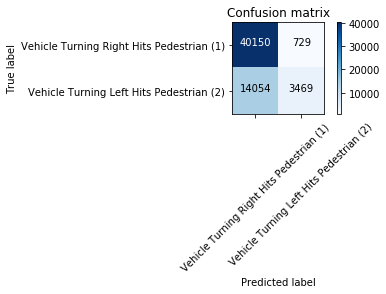

In [59]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Vehicle Turning Right Hits Pedestrian (1)','Vehicle Turning Left Hits Pedestrian (2)'],normalize= False, title='Confusion matrix')

In [60]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6869704549455835

In [61]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.746875107016883

## Build model with linear function and evaluate

In [62]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(x_train, y_train) 
yhat2 = clf2.predict(x_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

Avg F1-score: 0.6424
Jaccard score: 0.7279


## Build model with sigmoid function and evaluate

In [63]:
clf3 = svm.SVC(kernel='sigmoid')
clf3.fit(x_train, y_train) 
yhat3 = clf3.predict(x_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat3))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Avg F1-score: 0.6367
Jaccard score: 0.6373


<h2 id="Build Model">Build Model using KNN with Scikit-learn</h2>

In [64]:
#Using GridSearch to find the best parameters for KNN classifiction
n_neighbors= [2,3,4,5,7,10]

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, cv =5, param_grid =dict(n_neighbors = n_neighbors))

In [66]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [2, 3, 4, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
print(grid.best_score_)
print(grid.best_params_)

0.7402822317294215
{'n_neighbors': 10}


In [68]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [69]:
KNNpredictions = neigh.predict(x_test)

In [73]:
KNNpredictions=KNNpredictions.reshape(-1,1)

In [74]:
KNNpredictions.shape


(58402, 1)

In [75]:
y_test=y_test.to_numpy().reshape(-1,1)


In [76]:
y_test.shape


(58402, 1)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, KNNpredictions)

0.7505393650902367

In [78]:
print("Avg F1-score: %.4f" % f1_score(y_test, KNNpredictions, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, KNNpredictions))

Avg F1-score: 0.7098
Jaccard score: 0.7505
